In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

In [11]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [14]:
df_x = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_y = pd.Series(cancer.target, name="cancer")
df = pd.concat([df_x,df_y], axis=1)

In [15]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  cancer  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [81]:
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42, stratify=df_y)

In [21]:
log = LogisticRegression()
sv = SVC()
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
km = KMeans()
rfc = RandomForestClassifier()

In [36]:
knn_param = {"n_neighbors":[x for x in range(1,80)], "leaf_size":[x for x in range(15,35)], "p":[2], "metric":['minkowski', "euclidean"]}
knn_grid = GridSearchCV(knn, param_grid=knn_param, cv=10, verbose=2)


In [37]:
knn_grid.fit(X_train, y_train)

Fitting 10 folds for each of 3160 candidates, totalling 31600 fits
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=4, p=2 ..............

[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=11, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=19, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=25, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=31, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=38, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=44, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=50, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=56, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=62, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=68, p=2 ......

[CV]  leaf_size=15, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=15, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=15, metric=minkowski, n_neighbors=74, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=3, p=2 ..............

[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=10, p=2 .............

[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=16, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=30, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=38, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=44, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=51, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=58, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=64, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=70, p=2 ......

[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=15, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=15, metric=euclidean, n_neighbors=76, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=4, p=2 ..............

[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=10, p=2 .............

[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=15, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=21, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=29, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=37, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=44, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=50, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=57, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=63, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=70, p=2 ......

[CV]  leaf_size=16, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=16, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=16, metric=minkowski, n_neighbors=77, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=6, p=2 ..............

[CV]  leaf_size=16, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=12, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=18, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=26, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=34, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=41, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=48, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=54, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=61, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=68, p=2 ......

[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=16, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=16, metric=euclidean, n_neighbors=75, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=1, p=2 ..............

[CV]  leaf_size=17, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=17, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=16, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=23, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=32, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=39, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=46, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=53, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=59, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=65, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=72, p=2 ......

[CV]  leaf_size=17, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=17, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=17, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=6, p=2 ..............

[CV]  leaf_size=17, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=14, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=28, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=35, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=42, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=49, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=55, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=61, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=68, p=2 ......

[CV]  leaf_size=17, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=17, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=17, metric=euclidean, n_neighbors=74, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=1, p=2 ..............

[CV]  leaf_size=18, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=14, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=20, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=29, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=36, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=43, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=50, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=57, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=64, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=18, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=18, metric=minkowski, n_neighbors=76, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=4, p=2 ..............

[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=10, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=18, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=26, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=33, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=39, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=46, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=53, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=59, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=66, p=2 ......

[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=18, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=18, metric=euclidean, n_neighbors=73, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=2, p=2 ..............

[CV]  leaf_size=19, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=16, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=31, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=37, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=44, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=51, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=57, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=64, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=19, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=19, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=19, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=7, p=2 ..............

[CV]  leaf_size=19, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=16, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=23, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=31, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=38, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=46, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=52, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=59, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=65, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=71, p=2 ......

[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=19, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=19, metric=euclidean, n_neighbors=77, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=6, p=2 ..............

[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=12, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=26, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=33, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=39, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=46, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=52, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=59, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=65, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=20, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=20, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=20, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=6, p=2 ..............

[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=12, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=35, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=42, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=48, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=49, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=56, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=62, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=68, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=74, p=2 ......

[CV]  leaf_size=20, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=20, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=20, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=1, p=2 ...........

[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=14, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=20, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=26, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=31, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=32, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=40, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=48, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=55, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=62, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=69, p=2 ......

[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=21, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=21, metric=minkowski, n_neighbors=75, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=3, p=2 ..............

[CV]  leaf_size=21, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=9, p=2 ..............

[CV]  leaf_size=21, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=17, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=25, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=32, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=39, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=46, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=53, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=60, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=66, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=72, p=2 ......

[CV]  leaf_size=21, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=21, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=21, metric=euclidean, n_neighbors=79, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=6, p=2 ..............

[CV]  leaf_size=22, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=12, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=26, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=34, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=41, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=49, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=56, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=63, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=69, p=2 ......

[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=22, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=22, metric=minkowski, n_neighbors=76, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=4, p=2 ..............

[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=10, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=17, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=25, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=33, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=40, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=47, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=54, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=61, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=68, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=74, p=2 ......

[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=22, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=22, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=1, p=2 .......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=6, p=2 ..............

[CV]  leaf_size=23, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=13, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=13, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=13, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=13, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=19, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=25, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=25, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=32, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=40, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=40, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=47, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=48, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=55, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=61, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=68, p=2 ......

[CV]  leaf_size=23, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=23, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=23, metric=minkowski, n_neighbors=74, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=1, p=2 ..............

[CV]  leaf_size=23, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=8, p=2 ..............

[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=14, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=20, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=21, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=28, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=34, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=35, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=43, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=50, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=57, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=64, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=69, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=70, p=2 ......

[CV]  leaf_size=23, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=23, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=23, metric=euclidean, n_neighbors=76, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=3, p=2 ..............

[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=9, p=2 ..............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=10, p=2 .............

[CV]  leaf_size=24, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=16, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=16, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=22, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=22, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=22, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=28, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=35, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=42, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=49, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=55, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=62, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=69, p=2 ......

[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=24, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=24, metric=minkowski, n_neighbors=74, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=3, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=4, p=2 ..............

[CV]  leaf_size=24, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=12, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=17, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=18, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=26, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=32, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=40, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=47, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=53, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=61, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=67, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=73, p=2 ......

[CV]  leaf_size=24, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=24, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=24, metric=euclidean, n_neighbors=79, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=9, p=2 ..............

[CV]  leaf_size=25, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=15, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=21, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=27, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=35, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=43, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=51, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=58, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=65, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=72, p=2 ......

[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=25, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=25, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=8, p=2 ..............

[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=14, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=27, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=35, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=42, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=49, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=56, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=63, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=69, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=69, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=69, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=70, p=2 ......

[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=25, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=25, metric=euclidean, n_neighbors=76, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=5, p=2 ..............

[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=12, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=20, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=27, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=35, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=42, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=49, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=56, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=62, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=63, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=70, p=2 ......

[CV]  leaf_size=26, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=26, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=26, metric=minkowski, n_neighbors=76, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=4, p=2 ..............

[CV]  leaf_size=26, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=11, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=19, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=26, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=32, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=33, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=33, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=39, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=45, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=46, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=53, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=53, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=60, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=60, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=67, p=2 ......

[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=74, p=2 .............
[CV]  leaf_size=26, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=26, metric=euclidean, n_neighbors=74, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=1, p=2 ..............

[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=27, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=15, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=21, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=27, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=32, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=32, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=33, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=33, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=39, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=46, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=53, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=61, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=68, p=2 ......

[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=27, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=27, metric=minkowski, n_neighbors=74, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=2, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=2, p=2 ..............

[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=10, p=2 .............

[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=16, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=23, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=28, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=37, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=43, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=50, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=56, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=62, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=69, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=69, p=2 ......

[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=27, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=27, metric=euclidean, n_neighbors=76, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=5, p=2 ..............

[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=11, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=30, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=38, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=44, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=51, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=58, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=64, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=minkowski, n_neighbors=77, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=6, p=2 ..............

[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=13, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=19, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=26, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=31, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=38, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=44, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=50, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=57, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=64, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=71, p=2 ......

[CV]  leaf_size=28, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=28, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=28, metric=euclidean, n_neighbors=77, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=6, p=2 ..............

[CV]  leaf_size=29, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=13, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=13, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=13, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=21, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=26, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=26, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=27, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=27, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=34, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=34, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=35, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=42, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=49, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=56, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=57, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=63, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=64, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=69, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=69, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=70, p=2 ......

[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 .............
[CV]  leaf_size=29, metric=minkowski, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=29, metric=minkowski, n_neighbors=75, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=10, p=2 .............

[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=16, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=27, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=28, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=36, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=44, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=50, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=57, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=65, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=71, p=2 ......

[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=29, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=29, metric=euclidean, n_neighbors=77, p=2 ......

[CV] leaf_size=30, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=5, p=2, total=   0.0s

[CV]  leaf_size=30, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=11, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=29, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=35, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=41, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=41, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=42, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=42, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=48, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=48, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=54, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=61, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=61, p=2 ......

[CV]  leaf_size=30, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=67, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=68, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=68, p=2 ......

[CV] leaf_size=30, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=74, p=2, total=

[CV]  leaf_size=30, metric=minkowski, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=30, metric=minkowski, n_neighbors=79, p=2 .............
[CV]  leaf_size=30, metric=minkowski, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=1, p=2, total=   0.1s
[CV] leaf_size=30, metric=euclidean, n_neighbors=1, p=2 ............

[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=8, p=2 ..............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=8, p=2 ..............

[CV]  leaf_size=30, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=14, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=28, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=36, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=44, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=51, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=59, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=65, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=71, p=2 ......

[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=30, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=30, metric=euclidean, n_neighbors=78, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=8, p=2 ..............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=8, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=8, p=2 ..............

[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=14, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=14, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=20, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=20, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=28, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=28, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=29, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=36, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=37, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=45, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=52, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=58, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=65, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=72, p=2 ......

[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=31, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=31, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=7, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=7, p=2 ..............

[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=15, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=15, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=23, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=29, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=37, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=43, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=50, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=50, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=50, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=56, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=56, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=57, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=57, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=63, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=63, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=64, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=64, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=70, p=2 ......

[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 .............
[CV]  leaf_size=31, metric=euclidean, n_neighbors=76, p=2, total=   0.0s
[CV] leaf_size=31, metric=euclidean, n_neighbors=76, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=5, p=2 ..............

[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=12, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=29, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=30, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=38, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=46, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=53, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=53, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=53, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=59, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=65, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=66, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=32, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=32, metric=minkowski, n_neighbors=77, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=6, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=6, p=2 ..............

[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=13, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=13, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=13, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=19, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=19, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=19, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=25, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=25, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=31, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=31, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=31, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=39, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=46, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=47, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=47, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=54, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=54, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=62, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=62, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=62, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=68, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=68, p=2 ......

[CV]  leaf_size=32, metric=euclidean, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 .............
[CV]  leaf_size=32, metric=euclidean, n_neighbors=75, p=2, total=   0.0s
[CV] leaf_size=32, metric=euclidean, n_neighbors=75, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=3, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=3, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=4, p=2 ..............

[CV]  leaf_size=33, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=10, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=11, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=17, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=23, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=23, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=30, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=39, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=39, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=39, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=45, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=51, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=57, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=57, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=58, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=64, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=64, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=70, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=70, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=71, p=2 ......

[CV]  leaf_size=33, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=78, p=2 .............
[CV]  leaf_size=33, metric=minkowski, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=33, metric=minkowski, n_neighbors=78, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=4, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=5, p=2 ..............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=5, p=2 ..............

[CV]  leaf_size=33, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=11, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=12, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=12, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=17, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=18, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=24, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=30, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=35, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=35, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=36, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=36, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=36, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=44, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=44, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=44, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=51, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=51, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=52, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=52, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=58, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=58, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=59, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=59, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=65, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=65, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=66, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=71, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=71, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=72, p=2 ......

[CV]  leaf_size=33, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=77, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=77, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=78, p=2 .............
[CV]  leaf_size=33, metric=euclidean, n_neighbors=78, p=2, total=   0.0s
[CV] leaf_size=33, metric=euclidean, n_neighbors=78, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=4, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=4, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=5, p=2 ..............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=5, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=5, p=2 ..............

[CV]  leaf_size=34, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=11, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=11, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=12, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=12, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=12, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=18, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=18, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=24, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=24, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=30, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=30, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=37, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=37, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=38, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=38, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=38, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=45, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=45, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=46, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=46, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=46, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=52, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=52, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=59, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=60, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=60, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=66, p=2 ......

[CV]  leaf_size=34, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=73, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=74, p=2 .............
[CV]  leaf_size=34, metric=minkowski, n_neighbors=74, p=2, total=   0.0s
[CV] leaf_size=34, metric=minkowski, n_neighbors=74, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=1, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=1, p=2 ..............

[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=9, p=2 ..............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=9, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=10, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=10, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=10, p=2 ............

[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=16, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=16, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=22, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=22, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=29, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=29, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=30, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=42, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=42, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=43, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=43, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=43, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=49, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=49, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=55, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=55, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=61, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=61, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=66, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=66, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=67, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=67, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=72, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=72, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=73, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=73, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=73, p=2 ......

[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 .............
[CV]  leaf_size=34, metric=euclidean, n_neighbors=79, p=2, total=   0.0s
[CV] leaf_size=34, metric=euclidean, n_neighbors=79, p=2 ......

[Parallel(n_jobs=1)]: Done 31600 out of 31600 | elapsed:  4.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'leaf_size': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'p': [2], 'metric': ['minkowski', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
knn_grid.best_params_

{'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}

In [44]:
knn_grid_pred = knn_grid.predict(X_test)

In [42]:
print(confusion_matrix(y_test, knn_grid_pred))
print("\n")
print(classification_report(y_test, knn_grid_pred))

[[57  7]
 [ 8 99]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.88        64
           1       0.93      0.93      0.93       107

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [52]:
errors = []
k=[]
for i in range(1,80):
    knn_mod_i = KNeighborsClassifier(i)
    knn_mod_i.fit(X_train, y_train)
    knn_pred_i = knn_mod_i.predict(X_test)
    errors.append(np.mean(y_test != knn_pred_i))
    k.append(i)
errors= pd.Series(errors, index=k, name="error")

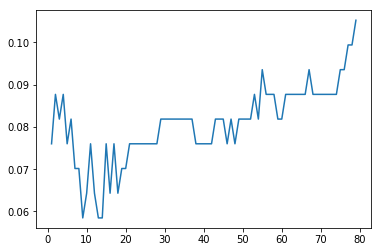

In [58]:
errors.plot()

In [61]:
knn_mod = KNeighborsClassifier(13)
knn_mod.fit(X_train, y_train)
knn_pred_13 = knn_mod.predict(X_test)

In [62]:
print(confusion_matrix(y_test, knn_pred_13))
print("\n")
print(classification_report(y_test, knn_pred_13))

[[ 57   7]
 [  3 104]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.94      0.97      0.95       107

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [65]:
o_grid_pred = knn_grid.predict(X_train)
o_knn_pred = knn_mod.predict(X_train)

In [130]:
n=[]
e=[]
for i in range(1,200):
    knn_cv_mod_i = KNeighborsClassifier(i)
    n.append(i)
    e.append(cross_val_score(knn_cv_mod_i, X_train, y_train, cv=10, scoring="average_precision").mean())
Accuracy = pd.Series(e, index=n, name="Error")

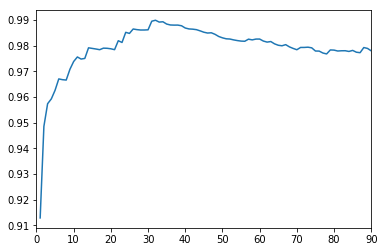

In [132]:
plt.xlim(0,90)
Accuracy.plot()

In [133]:
knn_cv_7 = KNeighborsClassifier(7)
knn_cv_7.fit(X_train, y_train)
pred_cv_7 = knn_cv_7.predict(X_test)

knn_cv_32 = KNeighborsClassifier(32)
knn_cv_32.fit(X_train, y_train)
pred_cv_32 = knn_cv_32.predict(X_test)

In [134]:
o_pred_cv_7 = knn_cv_7.predict(X_train)
o_pred_cv_32 = knn_cv_32.predict(X_train)

In [135]:
print("overfitted \n")
print(confusion_matrix(y_train, o_grid_pred))
print("\n")
print (classification_report(y_train, o_grid_pred))
print("\n")
print("Not overfitted \n")
print(confusion_matrix(y_train, o_knn_pred))
print("\n")
print (classification_report(y_train, o_knn_pred))
print("\n")
print("cv \n")
print(confusion_matrix(y_train, o_pred_cv_7))
print("\n")
print (classification_report(y_train, o_pred_cv_7))
print("\n")
print("cv Precision \n")
print(confusion_matrix(y_train, o_pred_cv_32))
print("\n")
print (classification_report(y_train, o_pred_cv_32))

overfitted 

[[138  10]
 [ 10 240]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       148
           1       0.96      0.96      0.96       250

   micro avg       0.95      0.95      0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



Not overfitted 

[[131  17]
 [  6 244]]


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       148
           1       0.93      0.98      0.95       250

   micro avg       0.94      0.94      0.94       398
   macro avg       0.95      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398



cv 

[[134  14]
 [  7 243]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       148
           1       0.95      0.97      0.96       250

   micro avg       0.95      0.95      0.95       398
   macro avg  

In [136]:
print("overfitted \n")
print(confusion_matrix(y_test, knn_grid_pred))
print("\n")
print (classification_report(y_test, knn_grid_pred))
print("\n")
print("Not overfitted \n")
print(confusion_matrix(y_test, knn_pred_13))
print("\n")
print (classification_report(y_test, knn_pred_13))
print("\n")
print("cv \n")
print(confusion_matrix(y_test, pred_cv_7))
print("\n")
print (classification_report(y_test, pred_cv_7))
print("\n")
print("precision cv \n")
print(confusion_matrix(y_test, pred_cv_32))
print("\n")
print (classification_report(y_test, pred_cv_32))

overfitted 

[[57  7]
 [ 8 99]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.88        64
           1       0.93      0.93      0.93       107

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



Not overfitted 

[[ 57   7]
 [  3 104]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.94      0.97      0.95       107

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



cv 

[[ 56   8]
 [  4 103]]


              precision    recall  f1-score   support

           0       0.93      0.88      0.90        64
           1       0.93      0.96      0.94       107

   micro avg       0.93      0.93      0.93       171
   macro avg      

In [128]:
from sklearn.metrics import SCORERS

In [129]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [138]:
log_2=LogisticRegression()

In [139]:
log_2.fit(df_x, df_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [159]:
log_pred_prob = log_2.predict_proba(X_test)[:,1]
log_pred = log_2.predict(X_test)

In [154]:
from sklearn.preprocessing import binarize

In [187]:
log_pred_spam = binarize([log_pred_prob], 0.85)[0]
log_pred_fraud = binarize([log_pred_prob], 0.25)[0]

In [174]:
print(confusion_matrix(y_test, log_pred))
print("\n")
print(classification_report(y_test, log_pred))

[[ 58   6]
 [  1 106]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.95      0.99      0.97       107

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [175]:
print(confusion_matrix(y_test, log_pred_spam))
print("\n")
print(classification_report(y_test, log_pred_spam))

[[64  0]
 [ 9 98]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        64
           1       1.00      0.92      0.96       107

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [188]:
print(confusion_matrix(y_test, log_pred_fraud))
print("\n")
print(classification_report(y_test, log_pred_fraud))

[[ 55   9]
 [  0 107]]


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.92      1.00      0.96       107

   micro avg       0.95      0.95      0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [178]:
y_test.value_counts()

1    107
0     64
Name: cancer, dtype: int64

In [181]:
hyp_1 = [1 for x in range(1,172)]
hyp_0 = [0 for x in range(1,172)]

In [182]:
print(confusion_matrix(y_test, hyp_1))
print("\n")
print(classification_report(y_test, hyp_1))

print("\n")
print(confusion_matrix(y_test, hyp_0))
print("\n")
print(classification_report(y_test, hyp_0))

[[  0  64]
 [  0 107]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.63      1.00      0.77       107

   micro avg       0.63      0.63      0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



[[ 64   0]
 [107   0]]


              precision    recall  f1-score   support

           0       0.37      1.00      0.54        64
           1       0.00      0.00      0.00       107

   micro avg       0.37      0.37      0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Pre

In [189]:
from sklearn.metrics import roc_auc_score, roc_curve

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'True Positive Rate')

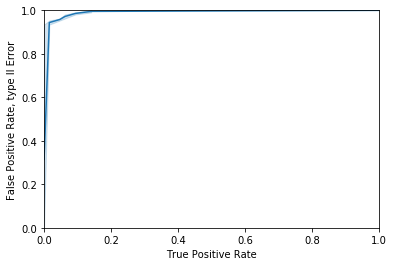

In [224]:
fpr, tpr, thr = roc_curve(y_test, log_pred_prob)
sns.lineplot(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("False Positive Rate, type II Error")
plt.xlabel("True Positive Rate")

Text(0.5, 0, 'True Positive Rate')

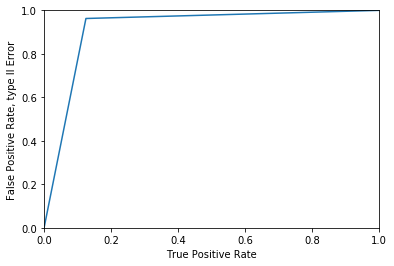

In [228]:
fpr, tpr, thr = roc_curve(y_test, pred_cv_7)
sns.lineplot(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("False Positive Rate, type II Error")
plt.xlabel("True Positive Rate")

In [208]:
roc_auc_score(y_test, log_pred_prob)

0.9959112149532711

In [202]:
roc_auc_score(y_test, log_pred_spam)

0.9579439252336448

In [213]:
np.shape(log_pred_prob)

(171,)

In [229]:
km = KMeans(2)

In [230]:
km.fit(df_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [251]:
km_pred = pd.Series(km.labels_, name="km_pred")
km_pred_inv = km_pred.apply(lambda x: 1 if x == 0 else 0)

In [252]:
print(confusion_matrix(df_y, km_pred))
print("\n")
print(classification_report(df_y, km_pred))

[[ 82 130]
 [356   1]]


              precision    recall  f1-score   support

           0       0.19      0.39      0.25       212
           1       0.01      0.00      0.00       357

   micro avg       0.15      0.15      0.15       569
   macro avg       0.10      0.19      0.13       569
weighted avg       0.07      0.15      0.10       569



In [253]:
print(confusion_matrix(df_y, km_pred_inv))
print("\n")
print(classification_report(df_y, km_pred_inv))

[[130  82]
 [  1 356]]


              precision    recall  f1-score   support

           0       0.99      0.61      0.76       212
           1       0.81      1.00      0.90       357

   micro avg       0.85      0.85      0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569



In [254]:
df_2 = pd.concat([df_x, km_pred_inv], names=["km_pred"], axis=1)

In [256]:
df_2.groupby("km_pred").mean()

mean radius  mean texture  mean perimeter    mean area  \
km_pred                                                           
0          19.379924     21.694580      128.231298  1185.929771   
1          12.556299     18.570365       81.123470   496.061872   

         mean smoothness  mean compactness  mean concavity  \
km_pred                                                      
0               0.101295          0.148613        0.176939   
1               0.094884          0.091100        0.062438   

         mean concave points  mean symmetry  mean fractal dimension  \
km_pred                                                               
0                   0.100699       0.191540                0.060603   
1                   0.033433       0.178058                0.063454   

                  ...             worst radius  worst texture  \
km_pred           ...                                           
0                 ...                23.709466      28.912672   
1                 ...                14.043902      24.709543   

         worst perimeter   worst area  worst smoothness  worst compactness  \
km_pred                                                                      
0             158.496183  1753.022901          0.140425           0.357758   
1              91.937511   619.647945          0.129959           0.223312   

         worst concavity  worst concave points  worst symmetry  \
km_pred                                                          
0               0.449306              0.192431        0.311882   
1               0.219215              0.091330        0.283554   

         worst fractal dimension  
km_pred                           
0                       0.086165  
1                       0.083282  

[2 rows x 30 columns]

In [257]:
words="hello world"

In [262]:
words.rstrip("r")

'hello world'

In [314]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [324]:
pca = PCA(2)
scaled_df_x = StandardScaler().fit_transform(df_x)


In [325]:
pca.fit(scaled_df_x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [326]:
d = pca.transform(df_x)

In [327]:
d[:,0]

array([ 793.36467353,  831.37630426,  751.11180013,  271.97374147,
        741.24885825,  332.42224651,  680.71265067,  399.80399517,
        344.10171024,  326.49924692,  510.47402648,  545.71978458,
        655.08356475,  441.2921941 ,  348.92024577,  430.87439002,
        481.12272588,  555.40759727,  932.23347092,  344.05658612,
        312.47159758,  171.68542779,  450.6772739 , 1011.91321212,
        802.7274709 ,  630.37710964,  413.60109256,  652.76384871,
        530.52112232,  570.94665753,  721.09787092,  364.23987043,
        588.43214256,  762.74293432,  538.71475007,  549.05711444,
        386.81152986,  290.81905003,  391.49845942,  351.54309921,
        362.24607904,  250.11348329,  726.18982907,  390.39008558,
        344.05589865,  683.44937712,  134.40560919,  349.99026668,
        283.56335698,  341.17005009,  264.40015646,  330.57336792,
        266.1113825 ,  619.4824815 ,  459.0303183 ,  255.5097875 ,
        843.19556807,  437.90480089,  314.89098041,  147.01318

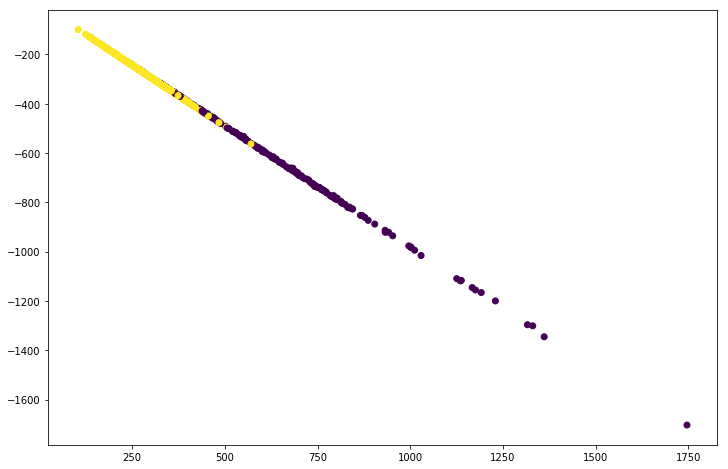

In [328]:
plt.figure(figsize=(12,8))
plt.scatter(d[:,0], d[:,1], c = df_y)

In [285]:
d.components_[1]

array([ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,  8.51823720e-01,
       -1.48194356e-05, -2.68862249e-06,  7.51419574e-05,  4.63501038e-05,
       -2.52430431e-05, -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
        8.19640791e-04,  7.51112451e-03,  1.49438131e-06,  1.27357957e-05,
        2.86921009e-05,  9.36007477e-06,  1.22647432e-05,  2.89683790e-07,
       -5.68673345e-04, -1.32152605e-02, -1.85961117e-04, -5.19742358e-01,
       -7.68565692e-05, -2.56104144e-04, -1.75471479e-04, -3.05051743e-05,
       -1.57042845e-04, -5.53071662e-05])

In [287]:
df_y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: cancer, Length: 569, dtype: int64

In [300]:
d.components_[0]

array([ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,  5.16826469e-01,
        4.23694535e-06,  4.05260047e-05,  8.19399539e-05,  4.77807775e-05,
        7.07804332e-06, -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
        2.23634150e-03,  5.57271669e-02, -8.05646029e-07,  5.51918197e-06,
        8.87094462e-06,  3.27915009e-06, -1.24101836e-06, -8.54530832e-08,
        7.15473257e-03,  3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
        6.42005481e-06,  1.01275937e-04,  1.68928625e-04,  7.36658178e-05,
        1.78986262e-05,  1.61356159e-06])

In [303]:
d

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)